# Tarea 4
## Física computacional

### Saúl A. Saldaña Enciso

1. 
a) Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz. (Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos list, prueben hacer directamente $(list-S)/S$ ).
Hacer lo mismo usando el método de bisección para $p_k$.

In [7]:
using SymPy
using PyPlot 
# Usaremos estas librerias para poder ejecutar las funciones y sus respectivas gráficas.

In [ ]:
function Raices_Newton(init) # Definimos el metodo de raices de Newton visto en clase. 
    list=zeros(100); # Tomamos una lista de zeros para las interaciones que queremos.
    x=init; 
    for i in 1:100 # Realizaremos nuestro metodo con un ciclo for, con el fin de avanzar en nuestro metodo en un rango escogido. 
        f = x^(3)-x^(2)-x-1 # Definiremos nuestra función
        df = 3*x^(2)-2*x-1 # Calculamo la primera derivada de nuestra función f
        x = x - f/df; #Aqui definimos en si lo que es el metodo de Newton, para esto definimos nuestra funcion y su derivada para poder buscar las raices que deseamos.
        list[i]= x; # Por ultimo queremos que se realice una lista de todas las interaciones de nuestro método.
    end
    return list
end;

In [9]:
# Para comprobar nuestro metodo, vamos a construir algunas "listas" que seran variables definidas en raices que buscamos, que seran util a la hora de graficar.

list_1 = Raices_Newton(10);
list_2 = Raices_Newton(20);
list_3 = Raices_Newton(30);
list_4 = Raices_Newton(40);
list_5 = Raices_Newton(50);

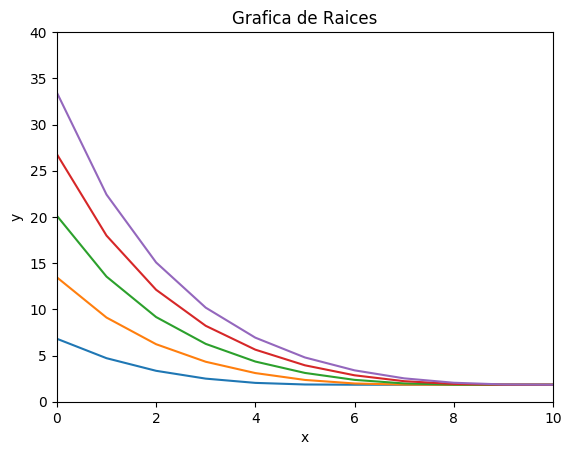

In [10]:
# Despues de definir nuestras variables como las soluciones de nuestros números elegidos, podemos graficar para ver el comportamiento de la convergencia de nuestra raiz en comun.


title("Grafica de Raices")
plot(real(list_1))
plot(real(list_2))
plot(real(list_3))
plot(real(list_4))
plot(real(list_5))
xlim(0,10)
ylim(0,40)
xlabel("x")
ylabel("y")
show();

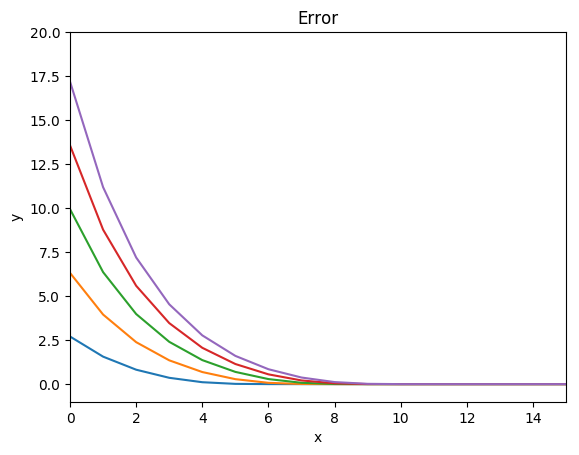

In [11]:
# Para gráficar el error de nuestra funcion, tomamos nuestras listas establecidas como variables y realizamos la operación correspondiente con la raiz. 
plot(real((list_1-list_1[100])/list_1[100])) 
plot(real((list_2-list_2[100])/list_2[100]))
plot(real((list_3-list_3[100])/list_3[100]))
plot(real((list_4-list_4[100])/list_4[100]))
plot(real((list_5-list_5[100])/list_5[100]))
xlim(0,15)
ylim(-1,20)
xlabel("x")
ylabel("y")
title("Error")
show();

b) Método de bisección

In [23]:
function Metodo_biseccion(a,b) #Definimos nuestra función para poder aplicar ahora el método de bisección.
    list=zeros(100) #Como el método pasado, realizamos nuestra lista de zeros para poder ir guardando los datos. 
    p = (a+b)/2 # Definimos nuestra variable p, siendo esta la mitad de la suma de nuestras entradas, para nuestro método. 
    f(x) = x^3-x^2-x-1 # Colocamos nuestra función la cual queremos aproximar con nuestras raices. 
    for i in 1:100 #Realizamos un ciclo for para nuestras iteraciones.
        if  f(a)*f(p) > 0 # Realizamos nuestra primera condición.
            a = p # Si cumple lo anterior entonces p sera igual a la primera entrada.
        end
        
        if f(b)*f(p) > 0 # Ponemos otra condición y de igual forma pedimo lo mismo que la anterior.
            b = p
        end
        p = (a+b)/2 # Si esto pasa, entonces soltaran los datos.
        list[i]= p #Por ultimo hacemos que se guarden los datos obtenidos. 
    end
    return list #Regresamos a la lista.
end;

In [24]:
#Creamos variables de nombre listas con diferentes intervalos [a,b] para poder comproar nuestro método..
list_1= Metodo_biseccion(0,5);
list_2= Metodo_biseccion(0,10);
list_3= Metodo_biseccion(0,20);
list_4= Metodo_biseccion(0,30);
list_5= Metodo_biseccion(0,40);
list_6= Metodo_biseccion(0,50);

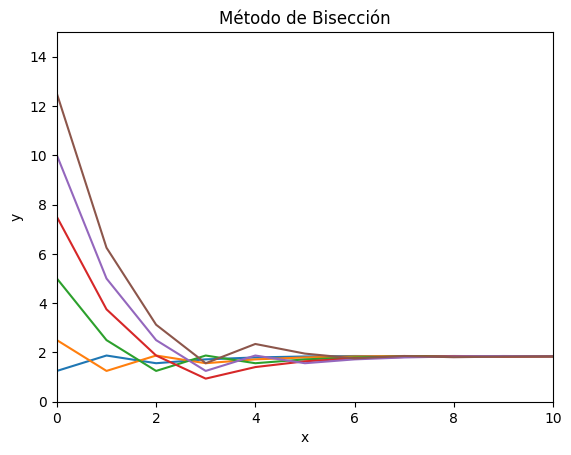

In [26]:
#Gráficamos nuestras variables:
plot(real(list_1))
plot(real(list_2))
plot(real(list_3))
plot(real(list_4))
plot(real(list_5))
plot(real(list_6))
xlim(0,10)
xlabel("x")
ylim(0,15)
ylabel("y")
title("Método de Bisección")
show() 

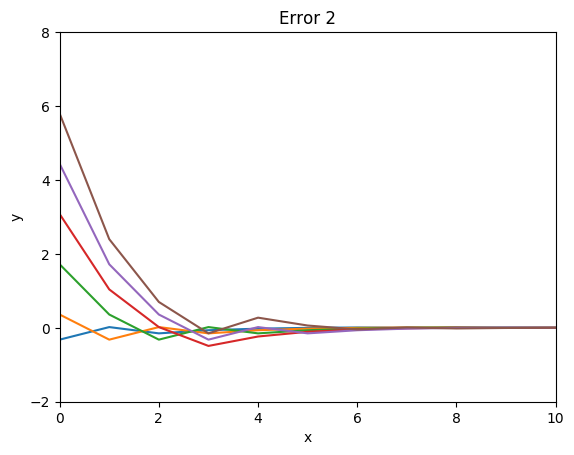

In [29]:
#Graficamos el error
plot(real((list_1-list_1[100])/list_1[100])) 
plot(real((list_2-list_2[100])/list_2[100])) 
plot(real((list_3-list_3[100])/list_3[100])) 
plot(real((list_4-list_4[100])/list_4[100])) 
plot(real((list_5-list_5[100])/list_5[100])) 
plot(real((list_6-list_6[100])/list_6[100])) 
xlim(0,10)
xlabel("x")
ylim(-2,8)
ylabel("y")
title("Error 2")
show() 

2 Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones (Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios):
- Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). El output debe ser alguna raíz.
- Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione llamando la funcion que crearon como metodo_newton.(f,df,x). Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El ouput debe ser un arreglo donde las entradas son raices, no importa que estén repetidas. Nota: Las funciones se pasan a la rutina SIN argumento, es decir solo como (por ej.) metodo(f).
- Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos linspace) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar  push! para ir guardando las raíces en un vector inicializado como (por ej.) t=[]. El output tiene que ser precisamente t.
- (Lean bien este paso!) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.
-- Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
-- La función que reciba esta rutina debe ser de Julia, para la derivada pueden usar SymPy internamente, recuerden que es facil convertir funciones de Julia en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de Julia e iterarlas, consulten la parte donde vimos la función lambdify.

In [7]:
using SymPy
using PyPlot # Usaremos las siguientes librerias.

In [8]:
function f(x);  # Definiremos nuestra función y su derivada, como funciones fijas.
    x^3-x^2-x-1 
end;
function df(x);
    3*x^2-2*x-1
end;

In [3]:
function Metodo_Newton(f,df,x0) #Definimos nuestra función, que recibira nuestra función cualquiera.
    x = x0;
    for i in 1:100 #Colocamos un ciclo for para 100 iteraciones.
        x = x-(f(x)/df(x)); #Definimos en si como funciona el metodo de Newton como el ejercicio anterior..
    end
    return x; #Regresamos a la raiz
end;

In [4]:
Metodo_Newton(f,df,100)

1.8392867552141612

In [33]:
function Newton_Metodo(f, df, int) #Realizamos nuestra nueva funcion, en este caso queremos eeleccionar un rango dado.
    list=zeros(length(int))
    x = 0.0 # Empezamos con un x igual a cero, ya que no al definirla, podemos darle este valor para que empiece a funcionar 
    for i in 1:length(int)# Empezamos con un ciclo for, que valla de 1 hasta nuestro lendth de nuestro intervalo cualquiera
        x = int[i]
        for j in 1:100 # Para la cual sacamos las icteracciones 
            x = x - (f(x)/df(x)) # Empleamos la definición del metodo de Newton
        end
        list[i] = x; # Queremos que regresén los valores a la lista anterior. 
    end
    list # Regresamos en forma de lista para nuestro output.
end;


In [34]:
Newton_Metodo(f,df,linspace(0.0,10.0,20)) # Ponemos un linspace para poder ver lo elementos arrojados, en este caso a partir de la 13 ava raiz se nota que tienen hacia la misma. 

20-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [21]:
function Metodo(f,x) 
    list=zeros(length(x))
    E = (1:200)
    list = Metodo[f,x]
    t =[]
    x = 0.0  
    for i in 1:length(x)
        df(x) = diff(f(x))
        x = x - (f(x)/df(x)) 
        if x == x;
            false 
        else x != x;
            true 
        end
        list[i] = x; 
    end
    list # Regresamos en forma de lista para nuestro output.
end;

In [22]:
Metodo(f,linspace(0,10,20))

LoadError: [91mMethodError: no method matching getindex(::#Metodo, ::#f, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}})[39m